# Art DATIS: Data Analysis¶


In [1]:
import glob
txts_path = '/ivi/ilps/projects/ArtDATIS/artdatis/tagging/OCRed/typed/'

# check all paths are unique
paths = []
for file_path in glob.glob(txts_path+'*_path.txt'):
    with open(file_path) as file:
        paths.append(file.read().strip())
print("Loaded %d paths"%len(paths))
# make sure there are no duplicate paths
assert len(paths) == len(set(paths))

Loaded 33974 paths


In [2]:
# 1. load OCRed texts into a corpus of documents
text_corpus = []
# filter out and collect text files
for file_path in glob.glob(txts_path+'*_text.txt'):
    with open(file_path, encoding="utf-8") as file:
        text = file.read()
        # filter duplicates
        if text not in text_corpus:
            text_corpus.append(text)
print("Loaded %d documents"%len(text_corpus))

Loaded 33443 documents


In [3]:
# 2. pre-processing: remove stopwords, split into words
import urllib.request
from pprint import pprint

def load_word_list(lang='en'):
    url = 'https://raw.githubusercontent.com/stopwords-iso/stopwords-%s/master/stopwords-%s.txt' % (lang, lang)
    stopwords = urllib.request.urlopen(url).read().decode('UTF-8').split()
    print("Loaded %s stopwords, e.g. %s" % (lang, ", ".join(stopwords[:2])))
    return set(stopwords)


# load stopwords
en_stoplist = load_word_list('en')
de_stoplist = load_word_list('de')
nl_stoplist = load_word_list('nl')
fr_stoplist = load_word_list('fr')

stoplist = en_stoplist | de_stoplist | nl_stoplist | fr_stoplist

# Lowercase each document, split it by white space and filter out stopwords
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in text_corpus]

Loaded en stopwords, e.g. 'll, 'tis
Loaded de stopwords, e.g. a, ab
Loaded nl stopwords, e.g. aan, aangaande
Loaded fr stopwords, e.g. a, abord


In [4]:
# Count word frequencies
word_list = [word for text in texts for word in text if word.isalpha()]

from collections import Counter
Counter(word_list).most_common()

[('glass', 21847),
 ('glas', 15299),
 ('art', 11112),
 ('museum', 9204),
 ('jaar', 8274),
 ('werk', 7901),
 ('och', 7782),
 ('amsterdam', 6908),
 ('kunst', 6907),
 ('nieuwe', 6739),
 ('heer', 6694),
 ('grote', 6204),
 ('uur', 5809),
 ('school', 5420),
 ('oe', 5346),
 ('leerdam', 5266),
 ('det', 5079),
 ('aantal', 4851),
 ('zeer', 4815),
 ('ter', 4715),
 ('som', 4596),
 ('crafts', 4559),
 ('arts', 4549),
 ('goed', 4539),
 ('og', 4504),
 ('med', 4496),
 ('beeldende', 4459),
 ('valkema', 4320),
 ('fiir', 4247),
 ('verre', 4220),
 ('vormgeving', 4218),
 ('design', 4072),
 ('galerie', 4033),
 ('studio', 4012),
 ('tijd', 3909),
 ('plaats', 3843),
 ('kunstenaars', 3740),
 ('rietveld', 3729),
 ('students', 3707),
 ('gaat', 3605),
 ('mogelijk', 3599),
 ('eee', 3496),
 ('tentoonstelling', 3430),
 ('att', 3400),
 ('enkele', 3313),
 ('academie', 3305),
 ('werken', 3283),
 ('vorm', 3253),
 ('international', 3248),
 ('september', 3243),
 ('nederlandse', 3220),
 ('jaren', 3208),
 ('time', 3160),
 ('g

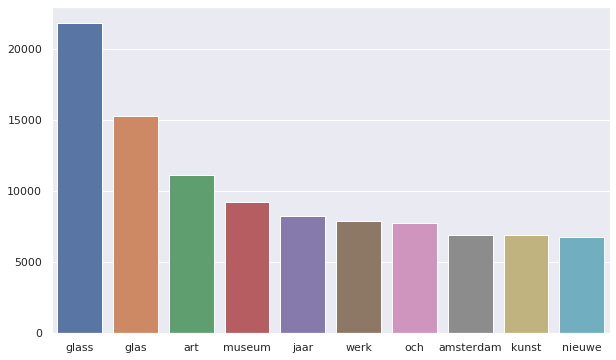

In [5]:
# Visualise counter
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

%matplotlib inline

labels, counts = [], []
for label, count in Counter(word_list).most_common(10):
    labels.append(label)
    counts.append(count)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=labels, y=counts)

In [6]:
# Count n-gram frequencies based on https://stackoverflow.com/questions/12488722/counting-bigrams-pair-of-two-words-in-a-file-using-python

from itertools import tee, islice

def ngrams(lst, n):
  tlst = lst
  while True:
    a, b = tee(tlst)
    l = tuple(islice(a, n))
    if len(l) == n:
      yield l
      next(b)
      tlst = b
    else:
      break

Counter(ngrams(word_list, 2)).most_common()

[(('sybren', 'valkema'), 1819),
 (('gerrit', 'rietveld'), 1736),
 (('rietveld', 'academie'), 1539),
 (('beeldende', 'kunst'), 1425),
 (('crafts', 'council'), 1340),
 (('stained', 'glass'), 738),
 (('corning', 'museum'), 697),
 (('hot', 'glass'), 693),
 (('industriéle', 'vormgeving'), 675),
 (('beeldende', 'kunstenaars'), 632),
 (('beeldende', 'kunsten'), 619),
 (('werkgroep', 'glas'), 610),
 (('harvey', 'littleton'), 600),
 (('glass', 'art'), 579),
 (('college', 'art'), 540),
 (('willem', 'heesen'), 537),
 (('royal', 'college'), 517),
 (('durk', 'valkema'), 489),
 (('stedelijk', 'museum'), 473),
 (('fine', 'arts'), 463),
 (('glass', 'studio'), 442),
 (('prinses', 'irenestraat'), 438),
 (('studio', 'glass'), 435),
 (('erwin', 'eisch'), 426),
 (('pilchuck', 'glass'), 408),
 (('instituut', 'kunstnijverheidsonderwijs'), 402),
 (('museum', 'glass'), 396),
 (('musée', 'arts'), 393),
 (('art', 'glass'), 388),
 (('glass', 'glass'), 385),
 (('vorig', 'jaar'), 368),
 (('arts', 'crafts'), 367),
 

In [7]:
Counter(ngrams(word_list, 3)).most_common()

[(('gerrit', 'rietveld', 'academie'), 986),
 (('corning', 'museum', 'glass'), 348),
 (('prinses', 'irenestraat', 'amsterdam'), 314),
 (('beeldende', 'kunst', 'vormgeving'), 277),
 (('royal', 'college', 'art'), 259),
 (('rietveld', 'academie', 'prinses'), 241),
 (('sybren', 'valkema', 'wilhelminalaan'), 240),
 (('academie', 'prinses', 'irenestraat'), 237),
 (('valkema', 'wilhelminalaan', 'blaricum'), 231),
 (('academie', 'beeldende', 'kunsten'), 202),
 (('vereniging', 'instituut', 'kunstnijverheidsonderwijs'), 200),
 (('pilchuck', 'glass', 'school'), 196),
 (('vereniging', 'vrienden', 'modern'), 187),
 (('instituut', 'industriéle', 'vormgeving'), 180),
 (('rietveld', 'academie', 'amsterdam'), 175),
 (('musée', 'arts', 'décoratifs'), 173),
 (('rhode', 'island', 'school'), 172),
 (('beantwoording', 'nummer', 'onderwerp'), 168),
 (('dormitory', 'student', 'cottage'), 150),
 (('kunstsammlungen', 'veste', 'coburg'), 149),
 (('fred', 'roeskestraat', 'amsterdam'), 149),
 (('nader', 'genoemde',

In [8]:
Counter(ngrams(word_list, 4)).most_common()

[(('gerrit', 'rietveld', 'academie', 'prinses'), 229),
 (('rietveld', 'academie', 'prinses', 'irenestraat'), 219),
 (('academie', 'prinses', 'irenestraat', 'amsterdam'), 195),
 (('sybren', 'valkema', 'wilhelminalaan', 'blaricum'), 171),
 (('nader', 'genoemde', 'theoriegebieden', 'tentamen'), 141),
 (('genoemde', 'theoriegebieden', 'tentamen', 'afgesloten'), 140),
 (('vereniging', 'vrienden', 'modern', 'glas'), 120),
 (('beantwoording', 'nummer', 'onderwerp', 'vermelden'), 102),
 (('rhode', 'island', 'school', 'design'), 98),
 (('vormgeving', 'vereniging', 'instituut', 'kunstnijverheidsonderwijs'), 96),
 (('beeldende', 'kunst', 'vormgeving', 'vereniging'), 95),
 (('huizen', 'postbus', 'aa', 'huizen'), 95),
 (('kunst', 'vormgeving', 'vereniging', 'instituut'), 94),
 (('basic', 'dormitory', 'tuition', 'student'), 93),
 (('opleiding', 'beeldende', 'kunst', 'vormgeving'), 92),
 (('koninklijke', 'nederlandsche', 'glasfabriek', 'leerdam'), 92),
 (('tuition', 'basic', 'dormitory', 'tuition'), 

In [ ]:
Counter(ngrams(word_list, 5)).most_common()

In [ ]:
Counter(ngrams(word_list, 6)).most_common()

In [ ]:
# check docs
keywords = ['verandering', 'brengt', 'orgaan', 'deelt', 'besluit', 'terstond']
results = [doc for doc in texts if set(keywords).issubset(set(doc))]
print("%d results"%len(results))
print(results[4])
print(results[1])
print(set(results[4]) - set(results[1]))

In [ ]:
print("HELL YEAH")